In [67]:
%matplotlib inline
#%matplotlib widget

In [68]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [69]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

In [79]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack_botnum_28cm_updated.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
all_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    #bot experiment loop
    FileName=row.linkingFileNamePack
    bot_num_current=row.bots
    starting_frame=read_time(row.start_min)+10*25
    ending_frame=read_time(row.end_min)
    data=pd.read_csv(passive_path+'\\'+FileName,index_col=0)
    relevant_data=data.iloc[starting_frame:ending_frame].reset_index()
    relevant_data['Filename']=[FileName]*len(relevant_data)
    relevant_data['BotNum']=[row.bots]*len(relevant_data)
    relevant_data['BotType']=[row.bottype]*len(relevant_data)
    all_data=pd.concat([all_data,relevant_data],axis=0)
all_data.to_csv(passive_path+'\\all_linking_passive_data_28cm.csv')

In [71]:
print(relevant_data)

       frame  frame.1      x      y      r  particle  \
0       1101     1101  660.5  541.5  104.3         0   
1       1102     1102  660.5  541.5  104.3         0   
2       1103     1103  660.5  541.5  104.3         0   
3       1104     1104  660.5  541.5  104.3         0   
4       1105     1105  661.5  541.5  104.3         0   
...      ...      ...    ...    ...    ...       ...   
24395  25496    25496  271.5  758.5  103.2         0   
24396  25497    25497  272.5  758.5  104.2         0   
24397  25498    25498  271.5  757.5  103.2         0   
24398  25499    25499  273.5  757.5  103.2         0   
24399  25500    25500  273.5  757.5  103.2         0   

                                   Filename  BotNum  BotType  
0      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
1      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
2      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
3      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
4      align

aligner_N004_D028_C0577.MP4_link.csv
8133
[ 1.65562028 -3.03012853]
[0.0009893  0.00323814]


Text(0, 0.5, 'MSD $\\left[\\rm{cm}^2\\right]$')

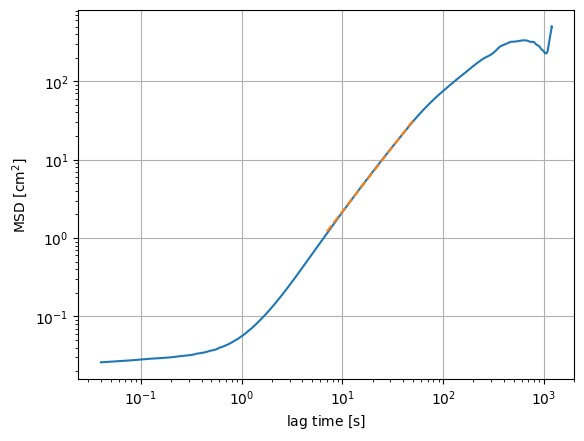

In [72]:
arenaSizePixels = 1080 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels #[cm/pixel]
expnum=15
exp_row=expSumPassive.iloc[expnum]
expnun_Filename=exp_row.linkingFileNamePack
print(expnun_Filename)
data=all_data[(all_data['Filename']==expnun_Filename)]
relevant_data_try = tp.filter_stubs(data,threshold=100)
max_lagtime=int(len(relevant_data)/3)
print(max_lagtime)
imsd_try = tp.imsd(relevant_data_try,fps=fps,mpp=mpp,max_lagtime=30000)
last_imsd_try=imsd_try.index[-1]
lag_time_thresh=int(last_imsd_try/150)
max_lagtime_thresh=int(last_imsd_try/3)
#relevant_imsd=imsd_try.loc[lag_time_thresh:max_lagtime_thresh]
relevant_imsd=imsd_try.loc[7:50]
fig,ax = plt.subplots()
#ax.plot(np.log(imsd_try.index),np.log(imsd_try),label='msd')
ax.loglog(imsd_try.index,imsd_try,label='msd')
p0=np.array([2,0.5])
popt,pcov = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd.index),np.log(relevant_imsd.iloc[:,0]),p0=p0)
perr = np.sqrt(np.diag(pcov))
corr=np.corrcoef(pcov,rowvar=True)
print(popt)
print(perr)
fit_x=np.log(relevant_imsd.index)
fit_y=fit_x*popt[0]+popt[1]
ax.loglog(np.exp(fit_x),np.exp(fit_y),'--')
#ax.plot(df.frame,df.x)
#ax.plot(df.frame,df.y)
x = np.linspace(1,10,10)
y = 0.02E0*x**1.75
#ax.loglog(x,y,'--',label='1.75')
#ax.axis([0.01,2000,0.01,1E4])
ax.grid()

ax.set_xlabel(r'lag time $\left[\rm{s}\right]$')
ax.set_ylabel(r'MSD $\left[\rm{cm}^2\right]$')

In [80]:
arenaSizePixels = 1080 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2 #[cm/pixel]
power_law=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    #if ((index==3)|(index==7)|(index==2)):
    #    continue
    FileName=row.linkingFileNamePack
    print(FileName)
    current_data=all_data[(all_data['Filename']==FileName)]
    relevant_data_try = tp.filter_stubs(current_data,threshold=1000)
    max_lagtime=int(len(relevant_data_try)/3)
    imsd = tp.imsd(relevant_data_try,fps=fps,mpp=mpp,max_lagtime=30000)
    #imsd = tp.imsd(current_data,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
    last_imsd_try=imsd.index[-1]
    lag_time_thresh=int(last_imsd_try/150)
    max_lagtime_thresh=int(last_imsd_try/3)
    #relevant_imsd_max=imsd.loc[2:50]
    relevant_imsd_max=imsd.loc[7:50]
    #relevant_imsd_max=imsd.loc[lag_time_thresh:max_lagtime_thresh]
    #relevant_imsd_min=imsd.loc[4:20]
    relevant_imsd_min=imsd.loc[10:20]
    p0=np.array([2,0.5])
    popt_max,pcov_max = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd_max.index),np.log(relevant_imsd_max.iloc[:,0]),p0=p0)
    perr_max = np.sqrt(np.diag(pcov_max))
    corr_max=np.corrcoef(pcov_max,rowvar=True)
    popt_min,pcov_min = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd_min.index),np.log(relevant_imsd_min.iloc[:,0]),p0=p0)
    perr_min = np.sqrt(np.diag(pcov_min))
    corr_min=np.corrcoef(pcov_min,rowvar=True)
    data_row=pd.DataFrame()
    data_row['FileName']=[FileName]
    data_row['n_max']=[popt_max[0]]
    data_row['n_max_err']=[perr_max[0]]
    data_row['A_max']=[np.exp(popt_max[1])]
    data_row['A_max_err']=[perr_max[1]]
    data_row['n_min']=[popt_min[0]]
    data_row['n_min_err']=[perr_min[0]]
    data_row['A_min']=[np.exp(popt_min[1])]
    data_row['A_min_err']=[perr_min[1]]
    data_row['Bot_Type']=row.bottype
    data_row['Bot_num']=row.bots
    power_law=pd.concat([power_law,data_row],axis=0)
power_law.to_csv(passive_path+'\\power_law_28cm_diameter.csv')

fronter_N001_D028_C0556.MP4_link.csv
fronter_N001_D028_C0555.MP4_link.csv
updated_test_fronter_N001_D028_C0554.MP4_link.csv
updated_test_fronter_N001_D028_C0553.MP4_link.csv
aligner_N001_D028_C0575.MP4_link.csv
aligner_N001_D028_C0574.MP4_link.csv
aligner_N001_D028_C0573.MP4_link.csv
aligner_N001_D028_C0572.MP4_link.csv
fronter_N004_D028_C0560.MP4_link.csv
fronter_N004_D028_C0559.MP4_link.csv
fronter_N004_D028_C0558.MP4_link.csv
fronter_N004_D028_C0557.MP4_link.csv
aligner_N004_D028_C0580.MP4_link.csv
aligner_N004_D028_C0579.MP4_link.csv
aligner_N004_D028_C0578.MP4_link.csv
aligner_N004_D028_C0577.MP4_link.csv
aligner_N004_D028_C0576.MP4_link.csv
fronter_N008_D028_C0567.MP4_link.csv
fronter_N008_D028_C0566.MP4_link.csv
fronter_N008_D028_C0565.MP4_link.csv
fronter_N008_D028_C0563.MP4_link.csv
fronter_N008_D028_C0562.MP4_link.csv
aligner_N008_D028_C0587.MP4_link.csv
aligner_N008_D028_C0586.MP4_link.csv
aligner_N008_D028_C0585.MP4_link.csv
aligner_N008_D028_C0584.MP4_link.csv
aligner_N008

In [81]:
#.loc[("fronter")])
mean_data=power_law.groupby(by=["Bot_Type","Bot_num"]).mean()
print(mean_data.loc[("fronter","n_min")])
print(mean_data.loc[("aligner","n_min")])
std_data=power_law.groupby(by=["Bot_Type","Bot_num"]).std()
count_data=power_law.groupby(by=["Bot_Type","Bot_num"]).count()
print(count_data)
print(power_law.set_index(["Bot_Type","Bot_num"]).loc[("fronter","n_min")])
print(power_law.set_index(["Bot_Type","Bot_num"]).loc[("aligner","n_min")])

Bot_num
1     1.193484
4     1.809249
8     1.707482
16    1.828103
21    1.742804
53    1.689351
Name: n_min, dtype: float64
Bot_num
1     1.333485
4     1.631920
8     1.582418
16    1.562332
21    1.523629
53    1.565046
Name: n_min, dtype: float64
                  FileName  n_max  n_max_err  A_max  A_max_err  n_min  \
Bot_Type Bot_num                                                        
aligner  1               4      4          4      4          4      4   
         4               5      5          5      5          5      5   
         8               6      6          6      6          6      6   
         16              4      4          4      4          4      4   
         21              4      4          4      4          4      4   
         53              4      4          4      4          4      4   
fronter  1               4      4          4      4          4      4   
         4               4      4          4      4          4      4   
         8        

C:\Users\User\AppData\Local\Temp\ipykernel_21468\2510933528.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data=power_law.groupby(by=["Bot_Type","Bot_num"]).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_21468\2510933528.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_data=power_law.groupby(by=["Bot_Type","Bot_num"]).std()
C:\Users\User\AppData\Local\Temp\ipykernel_21468\2510933528.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(power_law.set_index(["Bot_Type","Bot_num"]).loc[("fronter","n_min")])
C:\Users\User\AppData\Local\Temp\ipykernel_21468\2510

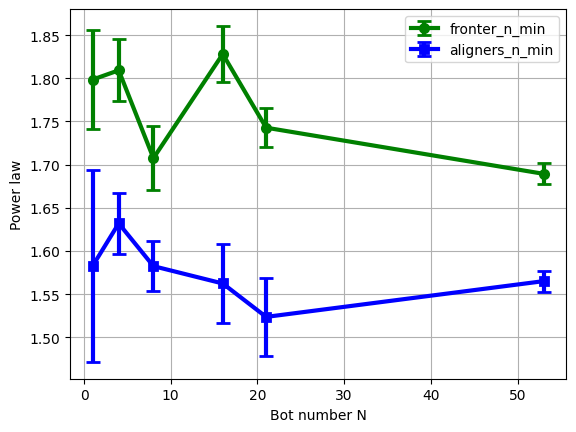

In [78]:
fronter_data=mean_data.loc[("fronter","n_min")]
fronter_data_max= mean_data.loc[("fronter","n_max")]
fronter_diff=fronter_data-fronter_data_max
aligner_data=mean_data.loc[("aligner","n_min")]
aligner_data_max=mean_data.loc[("aligner","n_max")]
aligner_diff=aligner_data-aligner_data_max
fronter_count=count_data.loc[("fronter","FileName")]
aligner_count=count_data.loc[("aligner","FileName")]
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_data,label='fronter_n_min',yerr=np.abs(fronter_diff.to_numpy())/np.sqrt(fronter_count),marker='o',capsize=5,color='green'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_data,label='aligners_n_min',yerr=np.abs(aligner_diff.to_numpy())/np.sqrt(aligner_count),marker='s',capsize=5,color='blue'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Bot number N')
ax.set_ylabel('Power law')
#ax.set_title('Imsd Power law Vs. Botnum')
ax.grid()
ax.legend()
saved_data=pd.DataFrame(data={'fronter_data': fronter_data
                              ,'fronter_data_max': fronter_data_max,'fronter_diff':fronter_diff,'aligner_data':aligner_data
                              ,'aligner_data_max':aligner_data_max,'aligner_diff':aligner_diff})
saved_data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\powerlaw_vs_botnum_28cm.csv')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\powerlaw_vs_botnum_28cm.png',bbox_inches='tight')